In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Liver Disease Prediction 
# Problem Statement
There are many kinds of liver diseases and conditions. Some, like hepatitis, are caused by viruses. Others can be the result of drugs or drinking too much alcohol. Long-lasting injury or scar tissue in the liver can cause cirrhosis. Jaundice, or yellowing of the skin, can be one sign of liver disease.  
Based on the given data set, required to build best ML model for Liver disease prediction.

## Data Collection
- [Data Source: kaggle](https://www.kaggle.com/datasets/abhi8923shriv/liver-disease-patient-dataset)  

This data set contains 10 variables that are age, gender, total Bilirubin, direct Bilirubin, total proteins, albumin, A/G ratio, SGPT, SGOT and Alkphos.


#### Attribute Information:  

- Age: Age of the patient  
- Gender: Gender of the patient  
- TB: Total Bilirubin  
- DB: Direct Bilirubin  
- Alkphos Alkaline Phosphotase  
- Sgpt Alamine Aminotransferase  
- Sgot Aspartate Aminotransferase  
- TP: Total Protiens  
- ALB: Albumin  
- A/G Ratio Albumin and Globulin Ratio  
- Result: (labeled by the experts) 1 Liver Patient, 2 Non Liver Patient

## Data Jar



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Project_4/LPD_train.csv',encoding='latin1' )

In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

Some column names contains space as prefix, it should be renamed

In [ ]:
df.columns[8]

'\xa0ALB Albumin'

In [ ]:
df.rename(columns = {' Alkphos Alkaline Phosphotase': "Alkphos Alkaline Phosphotase",
                     ' Sgpt Alamine Aminotransferase' : 'Sgpt Alamine Aminotransferase',
                     ' ALB Albumin' : 'ALB Albumin',
                     'A/G Ratio Albumin and Globulin Ratio' : 'A/G Ratio'}, inplace = True)

In [ ]:
df.shape

(30691, 11)

Data set contains 30691 rows nand 11 columns (including target).   
Target feature is categorical and only 2 categories are involved heance its a binary classification problem

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age of the patient               30689 non-null  float64
 1   Gender of the patient            29789 non-null  object 
 2   Total Bilirubin                  30043 non-null  float64
 3   Direct Bilirubin                 30130 non-null  float64
 4   Alkphos Alkaline Phosphotase     29895 non-null  float64
 5   Sgpt Alamine Aminotransferase    30153 non-null  float64
 6   Sgot Aspartate Aminotransferase  30229 non-null  float64
 7   Total Protiens                   30228 non-null  float64
 8   ALB Albumin                      30197 non-null  float64
 9   A/G Ratio                        30132 non-null  float64
 10  Result                           30691 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


Dtypes of given data set is found acceptable.  
Few features are having null values

In [ ]:
df['Gender of the patient'].mode()

0    Male
Name: Gender of the patient, dtype: object

In [ ]:
df['Gender of the patient'].fillna('Male', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age of the patient               30689 non-null  float64
 1   Gender of the patient            30691 non-null  object 
 2   Total Bilirubin                  30043 non-null  float64
 3   Direct Bilirubin                 30130 non-null  float64
 4   Alkphos Alkaline Phosphotase     29895 non-null  float64
 5   Sgpt Alamine Aminotransferase    30153 non-null  float64
 6   Sgot Aspartate Aminotransferase  30229 non-null  float64
 7   Total Protiens                   30228 non-null  float64
 8   ALB Albumin                      30197 non-null  float64
 9   A/G Ratio                        30132 non-null  float64
 10  Result                           30691 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
df['Age of the patient'].mode()

0    45.0
Name: Age of the patient, dtype: float64

In [ ]:
df['Age of the patient'].fillna( 45.0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age of the patient               30691 non-null  float64
 1   Gender of the patient            30691 non-null  object 
 2   Total Bilirubin                  30043 non-null  float64
 3   Direct Bilirubin                 30130 non-null  float64
 4   Alkphos Alkaline Phosphotase     29895 non-null  float64
 5   Sgpt Alamine Aminotransferase    30153 non-null  float64
 6   Sgot Aspartate Aminotransferase  30229 non-null  float64
 7   Total Protiens                   30228 non-null  float64
 8   ALB Albumin                      30197 non-null  float64
 9   A/G Ratio                        30132 non-null  float64
 10  Result                           30691 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
df.isnull().sum()

Age of the patient                   0
Gender of the patient                0
Total Bilirubin                    648
Direct Bilirubin                   561
Alkphos Alkaline Phosphotase       796
Sgpt Alamine Aminotransferase      538
Sgot Aspartate Aminotransferase    462
Total Protiens                     463
ALB Albumin                        494
A/G Ratio                          559
Result                               0
dtype: int64

max value of each test results can be acceptable as per the domain expert.

Based on the stages of human,  median values are imputed for each feature wrt Liver Patient and Non Liver Patient  

- Early school years: 4 - 12  
- Adolescence: 13 - 18  
- Young adulthood: 19 - 40  
- Middle adulthood: 41 - 65  
- Old age: >65

To fill the Nan Values of each feature of target value Liver Patient, Median value is considered based on the age range and gender

In [ ]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
count,30691.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107263,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.980524,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>4) & (df['Age of the patient']<=12) & (df['Result']==1)].describe()
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>13) & (df['Age of the patient']<=18) & (df['Result']==1)].describe()
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>19) & (df['Age of the patient']<=40) & (df['Result']==1)].describe()
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>41) & (df['Age of the patient']<=65) & (df['Result']==1)].describe()
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>65) & (df['Result']==1)].describe() 

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
count,7675.000000,7504.00000,7513.000000,7464.000000,7540.000000,7542.000000,7534.000000,7540.000000,7527.000000,7675.0
mean,52.362997,4.28822,2.002995,311.525188,98.589257,133.726598,6.469326,3.051260,0.912123,1.0
std,7.048297,7.20224,3.273221,246.106265,200.810847,290.681583,1.064196,0.774523,0.332975,0.0
min,42.000000,0.40000,0.100000,63.000000,12.000000,11.000000,2.700000,0.900000,0.300000,1.0
25%,46.000000,0.80000,0.200000,186.000000,25.000000,30.000000,5.800000,2.500000,0.700000,1.0
50%,51.000000,1.40000,0.500000,230.000000,41.000000,53.000000,6.600000,3.000000,0.900000,1.0
75%,60.000000,3.90000,2.000000,315.000000,78.000000,113.000000,7.200000,3.600000,1.100000,1.0
max,65.000000,75.00000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.0


In [ ]:
data1 = {'Feature': df.select_dtypes(exclude='object').columns,
        "age range1": ["4-12", 1.200000,	0.500000,	224.000000,	40.000000,	48.00000,	6.900000,	3.100000,	0.900000,	1.0],
        "age range2": ["13-18",	1.400000,	0.500000,	228.000000,	43.500000,	54.000000,	6.500000,	3.000000,	0.900000,	1.0],
        "age range3" : ["19-40",	1.400000,	0.500000,	230.000000,	43.000000,	54.000000,	6.600000,	3.000000,	0.900000,	1.0],
        "age range4" : ["41-65",	1.400000,	0.500000,	230.000000,	41.000000,	53.000000,	6.600000,	3.000000,	0.900000,	1.0],
        "age range5" : [">65",	1.500000,0.600000,	230.000000,	40.000000,	52.000000,	6.400000,	3.000000,	0.900000,	1.0]}

Male_LP_df = pd.DataFrame(data1)

In [ ]:
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>4) & (df['Age of the patient']<=12) & (df['Result']==1)].describe()
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>13) & (df['Age of the patient']<=18) & (df['Result']==1)].describe()
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>19) & (df['Age of the patient']<=40) & (df['Result']==1)].describe()
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>41) & (df['Age of the patient']<=65) & (df['Result']==1)].describe()
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>65) & (df['Result']==1)].describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
count,2728.000000,2683.000000,2695.000000,2680.000000,2699.000000,2692.000000,2697.000000,2696.000000,2693.000000,2728.0
mean,50.946114,4.316362,1.994026,326.554478,101.558355,146.795319,6.451947,3.041358,0.907193,1.0
std,6.526667,7.152659,3.275589,279.967690,218.197167,362.508038,1.120263,0.783569,0.330043,0.0
min,42.000000,0.400000,0.100000,63.000000,12.000000,11.000000,2.700000,0.900000,0.300000,1.0
25%,46.000000,0.800000,0.200000,185.750000,25.000000,30.000000,5.700000,2.500000,0.700000,1.0
50%,50.000000,1.400000,0.500000,232.000000,41.000000,56.000000,6.600000,3.000000,0.900000,1.0
75%,55.000000,3.700000,1.800000,331.000000,78.500000,114.000000,7.100000,3.600000,1.020000,1.0
max,65.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.0


In [ ]:
data2 = {'Feature': df.select_dtypes(exclude='object').columns,
        "age range1": ["4-12", 1.650000,	0.550000,	252.000000,	45.000000,	68.000000,	6.600000,	3.000000,	0.900000,	1.0],
        "age range2": ["13-18", 1.100000,	0.300000,	215.000000,	35.000000,	45.000000,	6.600000,	3.000000,	0.900000,	1.0],
        "age range3" : ["19-40",	1.300000,	0.500000,	224.000000,	40.000000,	51.500000,	6.500000,	3.000000,	0.900000,	1.0],
        "age range4" : ["41-65",	1.400000,	0.500000,	232.000000,	41.000000,	56.000000,	6.600000,	3.000000,	0.900000,	1.0],
        "age range5" : [">65",	1.100000,	0.400000,	218.000000,	38.500000,	50.000000,	6.450000,	3.000000,	0.900000,	1.0]}

Female_LP_df = pd.DataFrame(data2)

In [ ]:
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>4) & (df['Age of the patient']<=12) & (df['Result']==2)].describe()
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>13) & (df['Age of the patient']<=18) & (df['Result']==2)].describe()
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>19) & (df['Age of the patient']<=40) & (df['Result']==2)].describe()
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>41) & (df['Age of the patient']<=65) & (df['Result']==2)].describe()
#df[(df['Gender of the patient'] == 'Male') & (df['Age of the patient']>65) & (df['Result']==2)].describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
count,654.000000,645.000000,642.000000,636.000000,640.000000,643.000000,644.000000,648.000000,632.000000,654.0
mean,71.735474,1.202946,0.428349,224.108491,33.796875,42.298600,6.586957,3.296605,0.983370,2.0
std,4.965923,1.181617,0.606291,156.154645,26.000108,39.888916,1.016206,0.780533,0.282797,0.0
min,66.000000,0.500000,0.100000,90.000000,10.000000,10.000000,3.700000,1.400000,0.370000,2.0
25%,68.000000,0.700000,0.200000,160.000000,19.000000,21.000000,5.900000,2.775000,0.800000,2.0
50%,72.000000,0.800000,0.200000,187.000000,27.000000,29.000000,6.700000,3.300000,1.000000,2.0
75%,75.000000,1.100000,0.400000,216.000000,37.000000,47.000000,7.300000,3.900000,1.200000,2.0
max,90.000000,7.300000,3.600000,1580.000000,181.000000,285.000000,9.200000,5.000000,1.900000,2.0


In [ ]:
data3 = {'Feature': df.select_dtypes(exclude='object').columns,
        "age range1": ["4-12",	0.800000,	0.200000,	194.000000,	26.000000, 42.000000,	6.700000,	3.400000,	1.000000,	2.0],
        "age range2": ["13-18",	0.800000,	0.200000,	187.000000,	27.000000,	29.000000,	6.700000,	3.600000,	1.000000,	2.0],
        "age range3" : ["19-40",	0.800000,	0.200000,	185.000000,	26.000000,	30.000000,	6.600000,	3.300000,	1.000000,	2.0],
        "age range4" : ["41-65",	0.800000,	0.200000,	187.000000,	28.000000,	29.000000,	6.600000,	3.300000,	1.000000,	2.0],
        "age range5" : [">65",	0.800000,	0.200000,	187.500000,	27.000000,	29.000000,	6.700000,	3.300000,	1.000000,	2.0]}

Male_NLP_df = pd.DataFrame(data3)

In [ ]:
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>4) & (df['Age of the patient']<12) & (df['Result']==2)].describe()
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>13) & (df['Age of the patient']<18) & (df['Result']==2)].describe()
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>19) & (df['Age of the patient']<40) & (df['Result']==2)].describe()
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>41) & (df['Age of the patient']<65) & (df['Result']==2)].describe()
#df[(df['Gender of the patient'] == 'Female') & (df['Age of the patient']>65) & (df['Result']==2)].describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
count,187.000000,178.000000,182.000000,184.000000,184.000000,185.000000,185.000000,184.00000,185.000000,187.0
mean,71.566845,1.017416,0.345055,215.793478,33.086957,39.145946,6.661081,3.43750,1.058541,2.0
std,5.154555,0.835633,0.438673,160.952971,24.755483,33.200565,1.076528,0.75216,0.289217,0.0
min,66.000000,0.500000,0.100000,100.000000,10.000000,10.000000,3.700000,1.40000,0.370000,2.0
25%,68.000000,0.700000,0.200000,161.750000,18.000000,21.000000,6.000000,3.00000,0.900000,2.0
50%,70.000000,0.800000,0.200000,182.000000,26.000000,29.000000,6.800000,3.55000,1.000000,2.0
75%,75.000000,1.000000,0.300000,208.000000,38.500000,41.000000,7.400000,4.00000,1.200000,2.0
max,90.000000,7.300000,3.600000,1580.000000,160.000000,231.000000,8.500000,5.00000,1.900000,2.0


In [ ]:
data4 = {'Feature': df.select_dtypes(exclude='object').columns,
        "age range1": ["4-12",	0.750000,	0.200000,	185.000000,	28.000000,	29.000000,	6.650000,	3.550000,	1.015000,	2.0],
        "age range2": ["13-18",	0.800000,	0.200000,	198.000000,	28.000000, 28.500000,	6.750000,	3.600000,	1.100000,	2.0],
        "age range3" : ["19-40",	0.800000,	0.200000,	185.000000,	27.00000,	28.000000,	6.650000,	3.400000,	1.000000,	2.0],
        "age range4" : ["41-65",	0.800000,	0.200000,	187.000000,	27.000000,	29.000000,	6.400000,	3.300000,	1.000000,	2.0],
        "age range5" : [">65",	0.800000,	0.200000,	182.000000,	26.000000,	29.000000,	6.800000,	3.55000, 1.000000,	2.0]}

Female_NLP_df = pd.DataFrame(data4)

In [ ]:
df.isnull().sum()

Age of the patient                   0
Gender of the patient                0
Total Bilirubin                    648
Direct Bilirubin                   561
Alkphos Alkaline Phosphotase       796
Sgpt Alamine Aminotransferase      538
Sgot Aspartate Aminotransferase    462
Total Protiens                     463
ALB Albumin                        494
A/G Ratio                          559
Result                               0
dtype: int64

In [ ]:
df.fillna(0,inplace=True)

Replacing the NaN with 0 and value will be imputed with value corresponding to feature values

In [ ]:
df.isnull().sum()

Age of the patient                 0
Gender of the patient              0
Total Bilirubin                    0
Direct Bilirubin                   0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
Total Protiens                     0
ALB Albumin                        0
A/G Ratio                          0
Result                             0
dtype: int64

In [ ]:
Male_LP_df

,Feature,age range1,age range2,age range3,age range4,age range5
0,Age of the patient,4-12,13-18,19-40,41-65,>65
1,Total Bilirubin,1.2,1.4,1.4,1.4,1.5
2,Direct Bilirubin,0.5,0.5,0.5,0.5,0.6
3,Alkphos Alkaline Phosphotase,224.0,228.0,230.0,230.0,230.0
4,Sgpt Alamine Aminotransferase,40.0,43.5,43.0,41.0,40.0
5,Sgot Aspartate Aminotransferase,48.0,54.0,54.0,53.0,52.0
6,Total Protiens,6.9,6.5,6.6,6.6,6.4
7,ALB Albumin,3.1,3.0,3.0,3.0,3.0
8,A/G Ratio,0.9,0.9,0.9,0.9,0.9
9,Result,1.0,1.0,1.0,1.0,1.0


In [ ]:
col = Male_LP_df.columns[1:].tolist()
value = Male_LP_df[col[0]].tolist()
feature = Male_LP_df['Feature'].tolist()

In [ ]:
for j in range(0,1): # Change the value of range

  value = Male_LP_df[col[j]].tolist()
  feature = Male_LP_df['Feature'].tolist()
  print(col[j] ,':',value[0])
  value.remove(value[0])
  feature.remove('Age of the patient')
  print()

age range1 : 4-12



In [ ]:
for j in range(4,5): # Change the value of range

  value = Male_LP_df[col[j]].tolist()
  feature = Male_LP_df['Feature'].tolist()
  print(col[j] ,':',value[0])
  value.remove(value[0])
  feature.remove('Age of the patient')
  print()
  for i in range(0,8):
    #filter1 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=4) & (df['Age of the patient']<=12) & (df['Result']==1) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=13) & (df['Age of the patient']<=18) & (df['Result']==1) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=19) & (df['Age of the patient']<=40) & (df['Result']==1) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=41) & (df['Age of the patient']<=65) & (df['Result']==1) & (df[feature[i]]==0)

    #df.loc[filter1,feature[i]] = value[i]

    filter2 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=65) & (df['Result']==1) & (df[feature[i]]==0)
    df.loc[filter2,feature[i]] = value[i]
    print(feature[i],value[i])
  print("---------------------------")

age range5 : >65

Total Bilirubin 1.5
Direct Bilirubin 0.6
Alkphos Alkaline Phosphotase 230.0
Sgpt Alamine Aminotransferase 40.0
Sgot Aspartate Aminotransferase 52.0
Total Protiens 6.4
ALB Albumin 3.0
A/G Ratio 0.9
---------------------------


In [ ]:
df[(df['Gender of the patient'] == 'Male') & (df['Result']==1)].describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
count,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.0
mean,44.448729,4.251234,1.974426,315.516866,99.875061,137.168846,6.466005,3.053141,0.912667,1.0
std,16.172563,7.249048,3.274525,261.651699,209.064252,312.782862,1.068475,0.772949,0.330136,0.0
min,4.000000,0.400000,0.100000,63.000000,12.000000,11.000000,2.700000,0.900000,0.300000,1.0
25%,33.000000,0.800000,0.200000,188.000000,25.000000,30.000000,5.800000,2.500000,0.700000,1.0
50%,45.000000,1.400000,0.500000,230.000000,42.000000,53.500000,6.600000,3.000000,0.900000,1.0
75%,56.000000,3.700000,1.800000,315.000000,79.000000,113.000000,7.200000,3.600000,1.100000,1.0
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.0


In [ ]:
Female_LP_df

,Feature,age range1,age range2,age range3,age range4,age range5
0,Age of the patient,4-12,13-18,19-40,41-65,>65
1,Total Bilirubin,1.65,1.1,1.3,1.4,1.1
2,Direct Bilirubin,0.55,0.3,0.5,0.5,0.4
3,Alkphos Alkaline Phosphotase,252.0,215.0,224.0,232.0,218.0
4,Sgpt Alamine Aminotransferase,45.0,35.0,40.0,41.0,38.5
5,Sgot Aspartate Aminotransferase,68.0,45.0,51.5,56.0,50.0
6,Total Protiens,6.6,6.6,6.5,6.6,6.45
7,ALB Albumin,3.0,3.0,3.0,3.0,3.0
8,A/G Ratio,0.9,0.9,0.9,0.9,0.9
9,Result,1.0,1.0,1.0,1.0,1.0


In [ ]:
col = Female_LP_df.columns[1:].tolist()
value = Female_LP_df[col[0]].tolist()
feature = Female_LP_df['Feature'].tolist()

In [ ]:

for j in range(4,5):

  value = Female_LP_df[col[j]].tolist()
  feature = Female_LP_df['Feature'].tolist()
  print(col[j] ,':',value[0])
  value.remove(value[0])
  feature.remove('Age of the patient')
  print()
  for i in range(0,8):
    #filter1 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=4) & (df['Age of the patient']<=12) & (df['Result']==1 & (df[feature[i]]==0))
    #filter1 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=13) & (df['Age of the patient']<=18) & (df['Result']==1 & (df[feature[i]]==0))
    #filter1 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=19) & (df['Age of the patient']<=40) & (df['Result']==1 & (df[feature[i]]==0))
    #filter1 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=41) & (df['Age of the patient']<=65) & (df['Result']==1 & (df[feature[i]]==0))

    #df.loc[filter1,feature[i]] = value[i]

    filter2 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=65) & (df['Result']==1 & (df[feature[i]]==0))
    df.loc[filter2,feature[i]] = value[i]
    print(feature[i],value[i])
  print("---------------------------")

age range5 : >65

Total Bilirubin 1.1
Direct Bilirubin 0.4
Alkphos Alkaline Phosphotase 218.0
Sgpt Alamine Aminotransferase 38.5
Sgot Aspartate Aminotransferase 50.0
Total Protiens 6.45
ALB Albumin 3.0
A/G Ratio 0.9
---------------------------


In [ ]:
Male_NLP_df

,Feature,age range1,age range2,age range3,age range4,age range5
0,Age of the patient,4-12,13-18,19-40,41-65,>65
1,Total Bilirubin,0.8,0.8,0.8,0.8,0.8
2,Direct Bilirubin,0.2,0.2,0.2,0.2,0.2
3,Alkphos Alkaline Phosphotase,194.0,187.0,185.0,187.0,187.5
4,Sgpt Alamine Aminotransferase,26.0,27.0,26.0,28.0,27.0
5,Sgot Aspartate Aminotransferase,42.0,29.0,30.0,29.0,29.0
6,Total Protiens,6.7,6.7,6.6,6.6,6.7
7,ALB Albumin,3.4,3.6,3.3,3.3,3.3
8,A/G Ratio,1.0,1.0,1.0,1.0,1.0
9,Result,2.0,2.0,2.0,2.0,2.0


In [ ]:
col = Male_NLP_df.columns[1:].tolist()
value = Male_NLP_df[col[0]].tolist()
feature = Male_NLP_df['Feature'].tolist()


In [ ]:
for j in range(4,5): # Change the value of range

  value = Male_NLP_df[col[j]].tolist()
  feature = Male_NLP_df['Feature'].tolist()
  print(col[j] ,':',value[0])
  value.remove(value[0])
  feature.remove('Age of the patient')
  print()

age range5 : >65



In [ ]:

for j in range(4,5): # Change the value of range

  value = Male_NLP_df[col[j]].tolist()
  feature = Male_NLP_df['Feature'].tolist()
  print(col[j] ,':',value[0])
  value.remove(value[0])
  feature.remove('Age of the patient')
  print()
  for i in range(0,8):
    #filter1 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=4) & (df['Age of the patient']<=12) & (df['Result']==2) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=13) & (df['Age of the patient']<=18) & (df['Result']==2) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=19) & (df['Age of the patient']<=40) & (df['Result']==2) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=41) & (df['Age of the patient']<=65) & (df['Result']==2) & (df[feature[i]]==0)

    #df.loc[filter1,feature[i]] = value[i]

    filter2 = (df['Gender of the patient'] == 'Male') & (df['Age of the patient']>=65) & (df['Result']==2) & (df[feature[i]]==0)
    df.loc[filter2,feature[i]] = value[i]
    print(feature[i],value[i])
  print("---------------------------")

age range5 : >65

Total Bilirubin 0.8
Direct Bilirubin 0.2
Alkphos Alkaline Phosphotase 187.5
Sgpt Alamine Aminotransferase 27.0
Sgot Aspartate Aminotransferase 29.0
Total Protiens 6.7
ALB Albumin 3.3
A/G Ratio 1.0
---------------------------


In [ ]:
Female_NLP_df

,Feature,age range1,age range2,age range3,age range4,age range5
0,Age of the patient,4-12,13-18,19-40,41-65,>65
1,Total Bilirubin,0.75,0.8,0.8,0.8,0.8
2,Direct Bilirubin,0.2,0.2,0.2,0.2,0.2
3,Alkphos Alkaline Phosphotase,185.0,198.0,185.0,187.0,182.0
4,Sgpt Alamine Aminotransferase,28.0,28.0,27.0,27.0,26.0
5,Sgot Aspartate Aminotransferase,29.0,28.5,28.0,29.0,29.0
6,Total Protiens,6.65,6.75,6.65,6.4,6.8
7,ALB Albumin,3.55,3.6,3.4,3.3,3.55
8,A/G Ratio,1.015,1.1,1.0,1.0,1.0
9,Result,2.0,2.0,2.0,2.0,2.0


In [ ]:
col = Female_NLP_df.columns[1:].tolist()
value = Female_NLP_df[col[0]].tolist()
feature = Female_NLP_df['Feature'].tolist()

In [ ]:
for j in range(4,5): # Change the value of range

  value = Female_NLP_df[col[j]].tolist()
  feature = Female_NLP_df['Feature'].tolist()
  print(col[j] ,':',value[0])
  value.remove(value[0])
  feature.remove('Age of the patient')
  print()
  for i in range(0,8):
    #filter1 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=4) & (df['Age of the patient']<=12) & (df['Result']==2) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=13) & (df['Age of the patient']<=18) & (df['Result']==2) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=19) & (df['Age of the patient']<=40) & (df['Result']==2) & (df[feature[i]]==0)
    #filter1 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=41) & (df['Age of the patient']<=65) & (df['Result']==2) & (df[feature[i]]==0)

    #df.loc[filter1,feature[i]] = value[i]

    filter2 = (df['Gender of the patient'] == 'Female') & (df['Age of the patient']>=65) & (df['Result']==2) & (df[feature[i]]==0)
    df.loc[filter2,feature[i]] = value[i]
    print(feature[i],value[i])
  print("---------------------------")

age range5 : >65

Total Bilirubin 0.8
Direct Bilirubin 0.2
Alkphos Alkaline Phosphotase 182.0
Sgpt Alamine Aminotransferase 26.0
Sgot Aspartate Aminotransferase 29.0
Total Protiens 6.8
ALB Albumin 3.55
A/G Ratio 1.0
---------------------------


In [ ]:
Female_LP_df

,Feature,age range1,age range2,age range3,age range4,age range5
0,Age of the patient,4-12,13-18,19-40,41-65,>65
1,Total Bilirubin,1.6,1.4,1.4,1.4,1.4
2,Direct Bilirubin,0.6,0.5,0.5,0.6,0.5
3,Alkphos Alkaline Phosphotase,224.0,215.0,228.0,230.0,224.0
4,Sgpt Alamine Aminotransferase,46.0,40.0,42.0,41.0,40.0
5,Sgot Aspartate Aminotransferase,55.5,55.0,54.0,54.0,51.0
6,Total Protiens,6.8,6.6,6.5,6.6,6.4
7,ALB Albumin,3.2,2.9,3.0,3.0,3.0
8,A/G Ratio,0.9,0.9,0.9,0.9,0.9
9,Result,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
count,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.00000,30691.000000,30691.000000
mean,44.107263,3.324449,1.507545,287.195595,80.700384,110.488221,6.481819,3.12959,0.943298,1.285882
std,15.980524,6.197143,2.847277,235.726738,180.653867,278.845548,1.073903,0.78615,0.320276,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.90000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,176.000000,23.000000,26.000000,5.800000,2.60000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.10000,0.900000,1.000000
75%,55.000000,2.600000,1.300000,293.000000,61.000000,87.000000,7.200000,3.70000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.50000,2.800000,2.000000


In [ ]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [ ]:
df['Result'].unique()

array([1, 2])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Project_4/LPD_.csv')

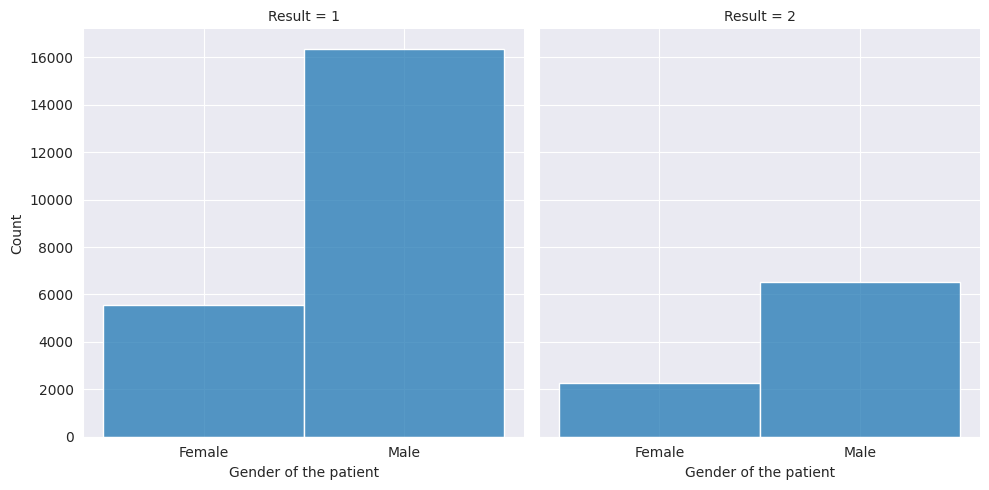

In [ ]:
sns.set_style("darkgrid")
sns.displot(data=df, x= 'Gender of the patient', kind= 'hist',  multiple="stack", col = 'Result') #, hue='Result'


In [ ]:
((df["Result"]==2) & (df['Gender of the patient']=="Male")).value_counts()

False    24167
True      6524
dtype: int64

Insight:

--- 

⭕  Total no. of Male are Liver patients : 16,364  
⭕  Total no. of Female are Liver patients : 5,553  

⭕  Total no. of Male are Non-Liver patients : 6,524  
⭕  Total no. of Female are Non-Liver patients : 2,250  


In [ ]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio', 'Result'],
      dtype='object')

In [ ]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
count,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.000000,30691.00000,30691.000000,30691.000000
mean,44.107263,3.324449,1.507545,287.195595,80.700384,110.488221,6.481819,3.12959,0.943298,1.285882
std,15.980524,6.197143,2.847277,235.726738,180.653867,278.845548,1.073903,0.78615,0.320276,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.90000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,176.000000,23.000000,26.000000,5.800000,2.60000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.10000,0.900000,1.000000
75%,55.000000,2.600000,1.300000,293.000000,61.000000,87.000000,7.200000,3.70000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.50000,2.800000,2.000000


#### Encoding 

In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
# Label encoding
df['Gender of the patient'] = df['Gender of the patient'].map({"Male":1,"Female":0})
df['Result'] = df['Result'].map({2:0, 1:1})

In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
df["Result"].unique()

array([1, 0])

#### Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio', 'Result'],
      dtype='object')

In [ ]:
X = df.drop(columns = ['Result'])
y = df['Result']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

#### Ensuring the class balance

In [ ]:
target_count = y_train.value_counts()

1    17564
0     6988
Name: Result, dtype: int64

propotion of 1: 0.72%
propotion of 0: 0.28%


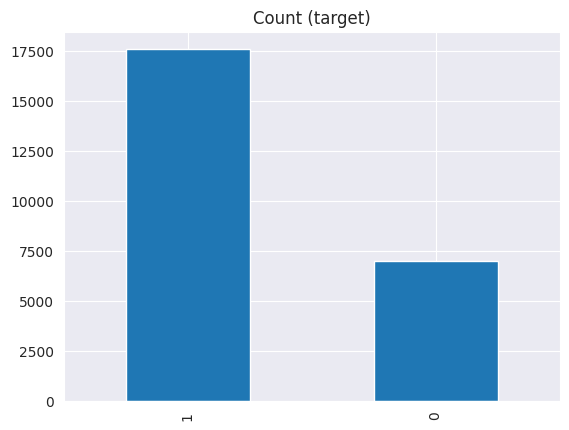

In [ ]:
target_count = y_train.value_counts()

print(target_count)
print()
print(f"propotion of 1: {round(target_count[1]/(target_count[1]+target_count[0]),2)}%")
print(f"propotion of 0: {round(target_count[0]/(target_count[1]+target_count[0]),2)}%")
target_count.plot(kind='bar', title='Count (target)');

Data set is slightly imbalanced

In [ ]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [ ]:
y_smt.value_counts()

0    17263
1    16968
Name: Result, dtype: int64


propotion of 0: 0.5%
propotion of 1: 0.5%


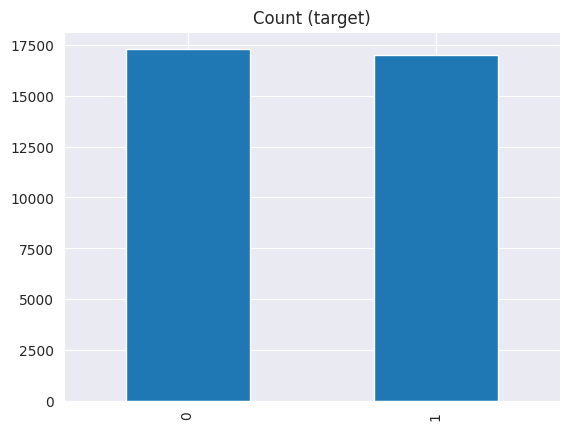

In [ ]:
target_count_smt = y_smt.value_counts()
print()
print(f"propotion of 0: {round(target_count_smt[0]/(target_count_smt[0]+target_count_smt[1]),2)}%")
print(f"propotion of 1: {round(target_count_smt[1]/(target_count_smt[0]+target_count_smt[1]),2)}%")
target_count_smt.plot(kind='bar', title='Count (target)');

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smt)
X_smt = scaler.transform(X_smt)
X_test = scaler.transform(X_test)

## Model Jar

In [ ]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          xgb.XGBClassifier(verbosity = 0)]

In [ ]:
def compare_model_cv(models:list):

  result = []

  for model in models:
    mod = model.fit(X_smt, y_smt) # fitting model without CV

    train_predictions = mod.predict(X_smt)
    train_score = roc_auc_score(y_smt, train_predictions)  

    test_predictions = mod.predict(X_test)
    test_score = roc_auc_score(y_test, test_predictions)

    cv_score = cross_val_score(model, X_smt, y_smt, cv=5) #fitting model with CV

    train_score = round(train_score,3)
    test_score = round(test_score,3)
    cv = round(np.mean(cv_score),3)


    print('AUROC training score of the ',model,'=',train_score,'%')
    print('AUROC test score of the ',model,'=',test_score,'%')
    print('Cross Validation accuracy for the',model,'=', cv,'%')
    print('-'*70)

    result.append({
                  'model used' : model,
                  'training Score (AUROC)' : train_score,
                  'test Score (AUROC)' : test_score,
                  'CV Score' : cv
                   })
    
  result_dataframe = pd.DataFrame(result, columns = ['model used','training Score (AUROC)', 'test Score (AUROC)', 'CV Score'])

  return result_dataframe

    

In [ ]:
model_performance = compare_model_cv(models)

AUROC training score of the  LogisticRegression() = 0.711 %
AUROC test score of the  LogisticRegression() = 0.702 %
Cross Validation accuracy for the LogisticRegression() = 0.711 %
----------------------------------------------------------------------
AUROC training score of the  KNeighborsClassifier() = 0.971 %
AUROC test score of the  KNeighborsClassifier() = 0.924 %
Cross Validation accuracy for the KNeighborsClassifier() = 0.937 %
----------------------------------------------------------------------
AUROC training score of the  DecisionTreeClassifier() = 1.0 %
AUROC test score of the  DecisionTreeClassifier() = 0.994 %
Cross Validation accuracy for the DecisionTreeClassifier() = 0.997 %
----------------------------------------------------------------------
AUROC training score of the  RandomForestClassifier() = 1.0 %
AUROC test score of the  RandomForestClassifier() = 0.998 %
Cross Validation accuracy for the RandomForestClassifier() = 0.999 %
-------------------------------------

In [ ]:
model_performance

,model used,training Score (AUROC),test Score (AUROC),CV Score
0,LogisticRegression(),0.711,0.702,0.711
1,KNeighborsClassifier(),0.971,0.924,0.937
2,DecisionTreeClassifier(),1.000,0.994,0.997
3,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000,0.998,0.999
4,"XGBClassifier(base_score=None, booster=None, c...",1.000,0.999,1.000


In [ ]:
def model_cv(leaning_rate:list, estimators = 100):

  result = []
  train_scores = []
  test_scores = []
  learning_rates = []

  for lr in leaning_rate:

    model = xgb.XGBClassifier(learning_rate = lr, n_estimators=estimators, verbosity = 0)
    learning_rates.append(lr)
    mod = model.fit(X_smt, y_smt) # fitting model without CV


    
    train_predictions = mod.predict(X_smt)
    train_score = roc_auc_score(y_smt, train_predictions)  
    train_scores.append(train_score)

    test_predictions = mod.predict(X_test)
    test_score = roc_auc_score(y_test, test_predictions)
    test_scores.append(test_score)

    train_score = round(train_score,3)
    test_score = round(test_score,3)
    #cv = round(np.mean(cv_score),3)

    result.append({
                  'model used' : "XGB",
                  'Train Score' : train_score,
                  'Test Score' : test_score,
                  'Lr' : lr
                   })
    
  result_dataframe = pd.DataFrame(result, columns = ['model used','Train Score', 'Test Score', 'Lr'])
  plt.plot(learning_rates, train_scores, 'o-', label='Train score')
  plt.plot(learning_rates, test_scores, 'o-', label='Test score')
  plt.xlabel(f'Learning rate ({estimators} Estimators)')
  plt.ylabel('Score')
  plt.legend(loc='best')
  plt.show()

  return result_dataframe

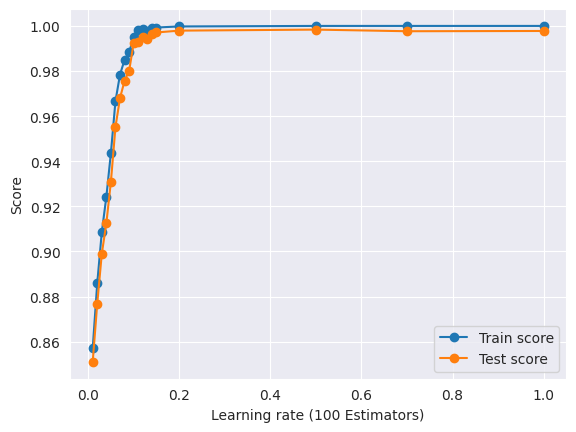

In [ ]:
lr = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]
model_cv_value_100 = model_cv(lr)

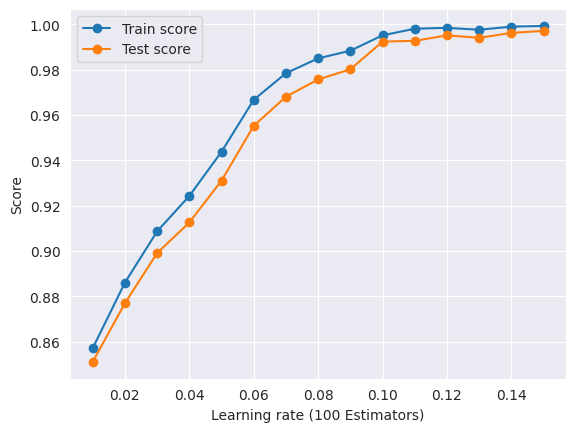

In [ ]:
lr = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
model_cv_value = model_cv(lr)

In [ ]:
model_cv_value

,model used,Train Score,Test Score,Lr
0,XGB,0.886,0.879,0.01
1,XGB,0.905,0.898,0.02
2,XGB,0.921,0.912,0.03
3,XGB,0.941,0.934,0.04
4,XGB,0.953,0.946,0.05
5,XGB,0.973,0.966,0.06
6,XGB,0.972,0.965,0.07
7,XGB,0.985,0.980,0.08
8,XGB,0.986,0.981,0.09
9,XGB,0.992,0.987,0.10


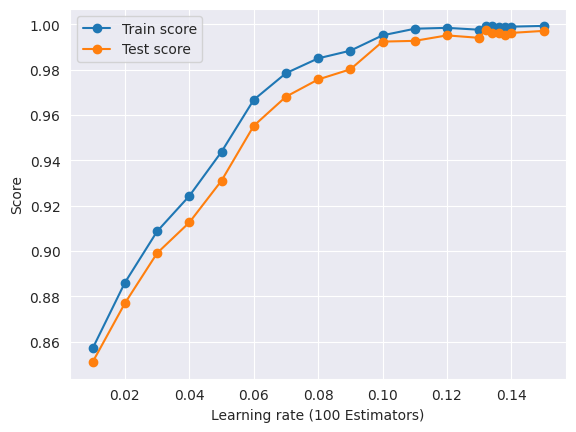

In [ ]:
lr = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.132,0.134,0.136,0.138,0.14,0.15]
model_cv_value1 = model_cv(lr)

In [ ]:
model_cv_value1

,model used,Train Score,Test Score,Lr
0,XGB,0.857,0.851,0.010
1,XGB,0.886,0.877,0.020
2,XGB,0.909,0.899,0.030
3,XGB,0.924,0.913,0.040
4,XGB,0.944,0.931,0.050
5,XGB,0.967,0.955,0.060
6,XGB,0.978,0.968,0.070
7,XGB,0.985,0.976,0.080
8,XGB,0.988,0.980,0.090
9,XGB,0.995,0.992,0.100


Selecting XGBoost with learning rate 0.132  
after learning rate 0.132 the score is constant i.e model is getting overfit

### Final Model

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.132,verbosity = 0)

mod = model.fit(X_smt, y_smt) # fitting model without CV



train_predictions = model.predict(X_smt)
train_score = roc_auc_score(y_smt, train_predictions)  


test_predictions = model.predict(X_test)
test_score = roc_auc_score(y_test, test_predictions)

train_score = round(train_score,3)
test_score = round(test_score,3)

In [ ]:
print('train_score',train_score)
print('test_score',test_score)

train_score 0.999
test_score 0.998


Feature Importance

In [ ]:
model.feature_importances_

array([0.00057155, 0.09524263, 0.05680995, 0.311638  , 0.09555049,
       0.10268345, 0.079856  , 0.09122914, 0.08192942, 0.08448929],
      dtype=float32)

In [ ]:
importance = model.feature_importances_
imp_feature = list(zip(importance.T,X.columns))
sorted(imp_feature, reverse=True)

[(0.311638, 'Direct Bilirubin'),
 (0.102683455, 'Sgpt Alamine Aminotransferase'),
 (0.09555049, 'Alkphos Alkaline Phosphotase'),
 (0.095242634, 'Gender of the patient'),
 (0.09122914, 'Total Protiens'),
 (0.084489286, 'A/G Ratio'),
 (0.081929415, 'ALB Albumin'),
 (0.079856, 'Sgot Aspartate Aminotransferase'),
 (0.056809947, 'Total Bilirubin'),
 (0.00057155243, 'Age of the patient')]

### Pickle file

In [ ]:
import pickle
import os

In [ ]:
def save_object(file_path, obj):
    try:
        dir_path = os.path.dirname(file_path)

        os.makedirs(dir_path, exist_ok=True)

        with open(file_path, "wb") as file_obj:
            pickle.dump(obj, file_obj)

    except Exception as e:
        print(e)

In [ ]:
def load_object(file_path):
    try:
        with open(file_path, "rb") as file_obj:
            return pickle.load(file_obj)

    except Exception as e:
         print(e)

In [ ]:
save_object('/content/drive/MyDrive/Project/Project_4/trained_model.pkl',model)

## Testing

In [ ]:
input_value = X_test.tolist()
result = y_test.tolist()

In [ ]:


print("Actual Output:", result[6])
print("Predicted Output:", model.predict([input_value[6]]))

Actual Output: 0
Predicted Output: [0]
